# Spectral Clustering ###
Step by step examples of spectral clustering.

In [ ]:
# imports, note scipy>=1.8 is needed
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import collections
from matplotlib.ticker import MaxNLocator
import community
import statistics as stats
from collections import Counter
import seaborn as sns
from matplotlib import rc
import pandas as pd
import csv
import sklearn.cluster
import scipy
import plotly
import plotly.graph_objs as go
print("done")

## 2 communities - Karate club example

Load the graph and display it using a "spring" layout.

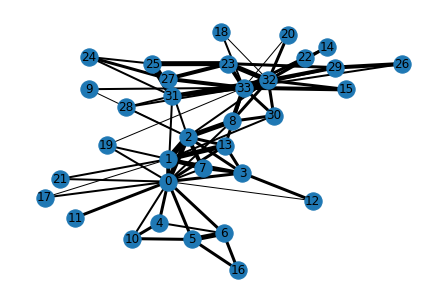

In [3]:
G_karate = nx.karate_club_graph()
pos = nx.spring_layout(G_karate)
weight_of_edges = list(nx.get_edge_attributes(G_karate, "weight").values())
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos, width=weight_of_edges)
plt.savefig('GraphBase.png')
plt.show()

Compute and use the fiedler vector to divide the graph in two communities

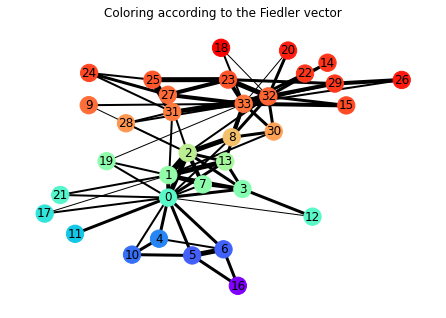

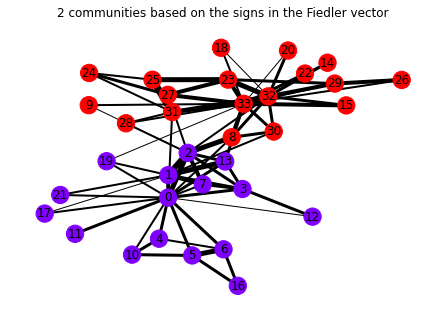

In [5]:
# Compute the Fiedler vector and display it on the graph
fiedler_vector = nx.fiedler_vector(G_karate)
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos, width=weight_of_edges, node_color = fiedler_vector)
plt.title('Coloring according to the Fiedler vector')
plt.show()

# separate in communities based on the signs in the Fiedler vector
partitions = fiedler_vector>0
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos, width=weight_of_edges, node_color = partitions)
plt.title("2 communities based on the signs in the Fiedler vector")
plt.show()

### 4 communities - stochastic block model example

Create randomly a graph with 4 highly intra-connected blocks and weak inter-connectivity

edge probabilities between the blocks : [[0.9, 0.1, 0.1, 0.1], [0.1, 0.9, 0.1, 0.1], [0.1, 0.1, 0.9, 0.1], [0.1, 0.1, 0.1, 0.9]]


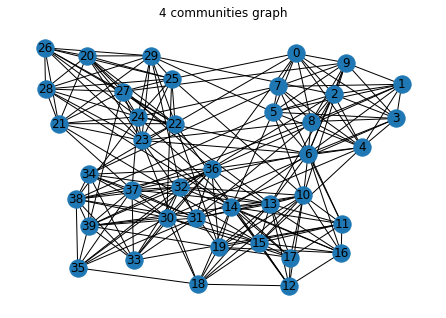

In [26]:
P = [[0.9 if i==j else 0.1 for j in range(4)]for i in range(4)]
print("edge probabilities between the blocks : "+str(P))
G = nx.stochastic_block_model([10,10,10,10], P)

# visualize the graph
nx.draw(G, with_labels=True)
plt.title("4 communities graph")
plt.show()

Compute and display the Laplacian and its spectral properties.

In [32]:
# spectral quantities of interest
print('Adjacency matrix : ')
print(nx.adjacency_matrix(G).todense())

print('\nLaplacian : ')
print(nx.laplacian_matrix(G).todense())

print('\nLaplacian spectral decomposition L = V * D * V^T')
D,V = scipy.linalg.eig(nx.laplacian_matrix(G).todense())

print('\nEigenvalues D')
print(D)

print('\nEigenvectors V')
print(V)

print('\nGoing back to the Laplacian V * D * V^T')
print(np.matmul(np.matmul(V,np.diag(D)),np.transpose(V)))

Adjacency matrix : 
[[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]

Laplacian : 
[[10  0 -1 ...  0  0  0]
 [ 0  9 -1 ...  0  0  0]
 [-1 -1 11 ...  0  0  0]
 ...
 [ 0  0  0 ... 12 -1 -1]
 [ 0  0  0 ... -1 13  0]
 [ 0  0  0 ... -1  0 13]]

Laplacian spectral decomposition L = V * D * V^T

Eigenvalues D
[-2.22044605e-15+0.j  3.01805796e+00+0.j  3.45697419e+00+0.j
  4.35946695e+00+0.j  1.77238190e+01+0.j  1.68444281e+01+0.j
  1.64929446e+01+0.j  1.63965898e+01+0.j  1.59223870e+01+0.j
  1.57242448e+01+0.j  7.22639687e+00+0.j  1.53742390e+01+0.j
  1.47783080e+01+0.j  1.45289275e+01+0.j  1.41529326e+01+0.j
  1.37706372e+01+0.j  1.35242649e+01+0.j  8.24047841e+00+0.j
  8.34470218e+00+0.j  8.54668902e+00+0.j  1.31058198e+01+0.j
  1.29108082e+01+0.j  1.27829887e+01+0.j  1.24660739e+01+0.j
  1.20400521e+01+0.j  1.18089378e+01+0.j  8.96249362e+00+0.j
  9.13703993e+00+0.j  1.13253279e+01+0.j  1.12078901e+01+0.j
  1.10477724e+0

/tmp/ipykernel_5388/2335544006.py:3: FutureWarning:

adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.

<class 'networkx.utils.decorators.argmap'> compilation 21:4: FutureWarning:

laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.



Each row of V is associated to one node, and each column to one eigenvalue. Note that the first column correspond to the trivial zero eigenvalue with an eigenvector that is constant on all nodes.

We can use the other columns to define an embedding for the node. Let's represent the 2-dimensional embedding of the nodes obtained by taking the second and third column.

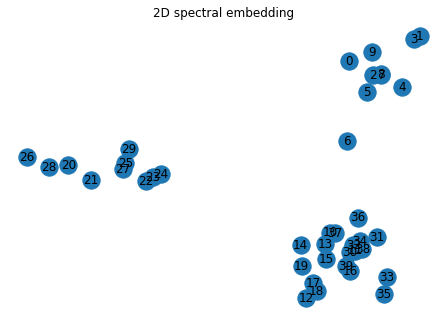

In [33]:
# visualize the nodes using the 2-dimensional spectral embedding of the nodes
# sometimes not informative enough to derive 4 communities
nx.draw_spectral(G, with_labels=True, edgelist=[])
plt.title("2D spectral embedding")
plt.show()

Now if we add the edges we obtain.

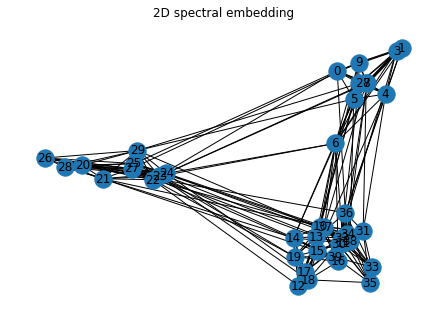

In [34]:
nx.draw_spectral(G, with_labels=True)
plt.title("2D spectral embedding")
plt.show()

As you can see this 2D embedding based on the matrix V reveals the structure of communities in the graph. However, we should observe clearly 4 communities. Depending on the randomly generated graph this can be hard to see. If we add one embedding dimension with one more column of V, we can correct the problem.

In [35]:
# Plot of the 3-dimensional embedding of the nodes, we can see 4 obvious clusters

spectral_coords = nx.spectral_layout(G, dim=3)
spectral_coords = list(zip(*spectral_coords.values()))

trace = go.Scatter3d(
    x=spectral_coords[0], 
    y=spectral_coords[1], 
    z=spectral_coords[2], 
    mode='markers',
    marker={
        'size': 10,
        'opacity': 0.8,
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)

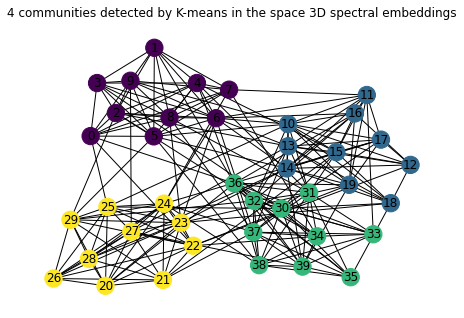

In [36]:
# in the 3-dimensional embedding space cluster the nodes in 4 communities with K-Means, then deduce communities
spectral_coords = nx.spectral_layout(G, dim=3)
partitions = sklearn.cluster.KMeans(n_clusters=4).fit_predict([spectral_coords[node] for node in G.nodes()])
nx.draw(G, with_labels=True, node_color = partitions)
plt.title("4 communities detected by K-means in the space 3D spectral embeddings")
plt.show()